In [1]:
from typing import TypedDict, Literal

from pipenv.cli.command import graph
from tensorflow.python.autograph.pyct.cfg import GraphBuilder


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["GBP", "EUR"]
    total: float

In [8]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.86
    return state

def convert_to_gbp(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.74
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state['target_currency']


In [9]:
from langgraph.graph import StateGraph, START, END

builder =  StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_eur_node", convert_to_eur)
builder.add_node("convert_to_gbp_node", convert_to_gbp)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "EUR": "convert_to_eur_node",
        "GBP": "convert_to_gbp_node",
    }
)
builder.add_edge(["convert_to_eur_node", "convert_to_gbp_node"], END)

graph = builder.compile()

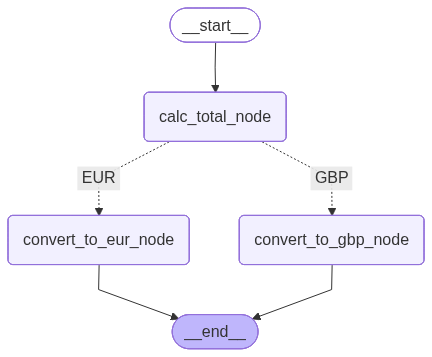

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"amount_usd": 1000, "target_currency": "GBP"})


{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'GBP',
 'total': 799.2}